<table style="border: none; text-align: center" width="100%">
  <tr style="border: none">
    <td style="min-width:250px; border:none; text-align:left" bgcolor="white">
      <a href="https://www.audiolabs-erlangen.de/" target="_blank">
        <img src="./files/logo_alabs.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:center" bgcolor="white">
      <a href="https://www.fau.de/" target="_blank">
        <img src="./files/logo_fau.svg" style="height:50px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:right" bgcolor="white">
      <a href="https://www.iis.fraunhofer.de/" target="_blank">
        <img src="./files/logo_iis.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
</tr>
</table>

<div style="text-align: center">
<h1>Short-Time Fourier Transform and Chroma Features</h1>
<b>Lab Course</b><br/>
<b>International Audio Laboratories Erlangen</b><br/>
<b>Prof. Dr. Meinard Müller</b><br/>
<b>Summer Term 2021</b>
</div>

<br/>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Authors</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/professor/mueller" class="list-group-item">Meinard Müller</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/balke" class="list-group-item">Stefan Balke</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow" class="list-group-item">Frank Zalkow</a>
</div>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Tutors of this Semester</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/oezer" class="list-group-item">Yigitcan Özer</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/rosenzweig" class="list-group-item">Sebastian Rosenzweig</a>
</div>

<div>
<em>Short-Time Fourier Transform and Chroma Features</em>, &copy; April 2021
</div>

## <a name="abstract"></a> Abstract

The Fourier transform, which is used to convert a time-dependent signal
to a frequency-dependent signal, is one of the most important mathematical tools
in audio signal processing. Applying the Fourier transform to local sections
of an audio signal, one obtains the short-time Fourier transform (STFT).
In this lab course, we study a discrete version of the STFT.
To work with the discrete STFT in practice, one needs to correctly
interpret the discrete time and frequency parameters.
Using Python, we compute a discrete STFT and visualize its magnitude in form of a
spectrogram representation. Then, we derive from the STFT various audio features
that are useful for analyzing music signals.
In particular, we develop a log-frequency spectrogram, where the
frequency axis is converted into an axis corresponding to musical pitches.
From this, we derive a chroma representation, which is a useful tool
for capturing harmonic information of music.

## <a name="Introduction"></a>  Introduction

Audio signals can be complex mixtures consisting of a multitude of different sound components.
A first step in better understanding a given signal is to decompose it into building
blocks that are better accessible for the subsequent processing steps.
In the case that these building blocks consist of complex-valued sinusoidal
functions, such a process is also called Fourier analysis.
The Fourier transform maps a time-dependent signal
to a frequency-dependent function which reveals the spectrum of
frequency components that compose the original signal.
Loosely speaking, a signal and its Fourier transform are two sides
of the same coin.
On the one side, the signal displays the time information and hides the
information about frequencies.
On the other side, the Fourier transform reveals information about
frequencies and hides the time information.

To obtain back the hidden time information, Dennis Gabor introduced
in the year 1946 the modified Fourier transform, now known as
*short-time Fourier transform* or simply STFT.
This transform is a compromise between a time- and a frequency-based
representation by determining the sinusoidal magnitude
and phase content of local sections of a signal as it changes over time.
In this way, the STFT  does not only tell which frequencies
are "contained" in the signal but also at which points of times or,
to be more precise, in which time intervals these frequencies appear.

<img src="./files/Feat_LogSpec_ChromaScale.png" width="66%" height="66%">

The figure sows various representations for a piano recording of the chromatic scale ranging from A0 ($p=21$) to C8 ($p=108$).
**(a)** Piano keys representing the chromatic scale.
**(b)** Spectrogram representation.
**(c)** Pitch-based log-frequency spectrogram.
**(d)** Chromagram representation.
For visualization purposes the values are color-coded using a logarithmic scale.
The C3 ($p=48$) played at time $t=30~{\mathrm{sec}}$ has been highlighted
by the rectangular frames.

The main objective of this lab course is to acquire a good understanding
of the STFT. To this end, we study a discrete version of the STFT
using the discrete Fourier transform (DFT), which can be efficiently
computed using the fast Fourier transform (FFT).
The discrete STFT yields a discrete set of Fourier coefficients
that are indexed by time and frequency parameters.
The correct physical interpretation of these parameters
in terms of units such as seconds and Hertz
depends on the sampling rate, the window size, and the
hop size used in the STFT computation.
In this lab course, we will compute a discrete STFT using Python
and then visualize its magnitude by a spectrogram representation,
see [the STFT-section](#STFT).
By applying the STFT to different audio examples and
by modifying the various parameters, one should get a
better understanding on how the STFT works in practice.

To make music data comparable and algorithmically accessible,
the first step in basically all music processing tasks is to extract
suitable *features* that capture relevant aspects
while suppressing irrelevant details.
In the second part of this lab course,  we study audio features and
mid-level representations that are particularly useful for
capturing pitch information of music signals.
Assuming that we are dealing with music that is based on the equal-tempered scale
(the scale that corresponds to the keys of a piano keyboard),
we will convert an audio recording into a feature representation
that reveals the distribution of the signal's energy across the different
pitches, see [the  Log-Frequency-Spectrogram-section](#LFS).
Technically, these features are obtained from a spectrogram by converting
the linear frequency axis (measured in Hertz) into a logarithmic axis
(measured in pitches).
From this log-frequency spectrogram, we then derive a time-chroma representation
by suitably combining pitch bands that correspond to the same chroma,
see [the Chroma-Features-section](#Chroma).
The resulting chroma features show a high degree of robustness to
variations in timbre and instrumentation.

## <a name="STFT"></a>  STFT

The Fourier transform and in particular the discrete STFT serve as
*front-end transform*, the first computing step,
for deriving a large number of different musically relevant audio features.
We now recall the definition of the discrete STFT while fixing some notation.
Let $x:[0:L-1]:=\{0,1,\ldots,L-1\}\to{\mathbb R}$ be a real-valued discrete-time signal of length $L$ obtained by
equidistant sampling with respect to a fixed sampling rate $F_\mathrm{s}$ given in Hertz ($\mathrm{Hz}$).
Furthermore, let $w:[0:N-1]:=\{0,1,\ldots,N-1\}\to{\mathbb R}$ be a discrete-time window
of length $N\in{\mathbb N}$ (usually a power of two) and let $H\in{\mathbb N}$ be a hop size parameter.
With regards to these parameters, the discrete STFT ${\mathcal X}$ of the signal $x$ is given by

\begin{eqnarray}
   {\mathcal X}(m,k):= \sum_{n=0}^{N-1} x(n+mH)w(n)\exp(-2\pi ikn/N)
\end{eqnarray}

with $m\in[0:\lfloor \frac{L-N}{H} \rfloor]$ and $k\in[0:K]$. The complex number ${\mathcal X}(m,k)$ denotes
the $k^{\mathrm{th}}$ Fourier coefficient for the $m^{\mathrm{th}}$ time frame,
where $K=N/2$ is the frequency index corresponding to the Nyquist frequency.
Each Fourier coefficient ${\mathcal X}(m,k)$ is associated with the physical time position
(using the start position of the window as reference point)

\begin{equation}
         {T_{\mathrm{coef}}(m)} := \frac{m\cdot H}{F_\mathrm{s}}
 \end{equation}

 given in seconds (${\mathrm{sec}}$) and with the physical frequency

 \begin{equation}
         F_{\mathrm{coef}}(k) := \frac{k\cdot F_\mathrm{s}}{N}
\end{equation}

given in Hertz ($\mathrm{Hz}$).
For example, using $F_\mathrm{s}=44100~\mathrm{Hz}$ as for a CD recording,
a window length of $N=4096$, and a hop size of $H=N/2$,
we obtain a time resolution of $H/F_\mathrm{s}\approx 46.4~\mathrm{ms}$
and frequency resolution of $F_\mathrm{s}/N\approx 10.8~\mathrm{Hz}$.

<div class="alert alert-block alert-danger">
<b>Installation</b><br>
Before starting with programming, you should install some Python packages, needed later. Please install them by executing the following cell:
</div>

In [2]:
!pip install pysoundfile==0.9.* librosa==0.8.*

  Attempting uninstall: soundfile
    Found existing installation: SoundFile 0.9.0.post1
    Uninstalling SoundFile-0.9.0.post1:
      Successfully uninstalled SoundFile-0.9.0.post1


<div class="alert alert-block alert-info">
<b>Homework Exercise 1 (to be submitted in handwritten form and correct mathematical notation)</b><br>
<ol>
<li>Compute the time and frequency resolution of the resulting STFT when using the following parameters of $F_\mathrm{s}$, $N$ and $H$. What are the Nyquist frequencies?
   <ul>
       <li> $F_\mathrm{s} = 22050$, $N = 1024$, $H = 512$</li>
       <li> $F_\mathrm{s} = 48000$, $N = 1024$, $H = 256$</li>
       <li> $F_\mathrm{s} = 4000$, $N = 4096$, $H = 1024$</li>
   </ul>
<li> Using $F_\mathrm{s}=44100$, $N=2048$ and $H=1024$, what is the physical meaning of the Fourier coefficients
    ${\mathcal X}(1000,1000)$, ${\mathcal X}(17,0)$, and ${\mathcal X}(56,1024)$?</li>
</ol>
</div>

In [3]:
# write the functions T_coef and F_coef...

Fs, N, H = 22050, 1024, 512
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (Fs, N, H, T_coef(1, H, Fs)*1000, F_coef(1, N, Fs), Fs/2))

Fs, N, H = 48000, 1024, 256
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (Fs, N, H, T_coef(1, H, Fs)*1000, F_coef(1, N, Fs), Fs/2))

Fs, N, H = 4000, 4096, 1024
print('Fs = %5d, N = %d, H = %4d: Tcoef = %6.2f msec, Fcoef = %5.2f Hz, Nyquist = %.2f Hz' % (Fs, N, H, T_coef(1, H, Fs)*1000, F_coef(1, N, Fs), Fs/2))

NameError: name 'T_coef' is not defined

In [ ]:
# write a function ex1_2 that returns the physical meaning of the given coefficients

Fs, N, H = 44100, 2048, 1024

m, k = 1000, 1000
ex1_2(Fs, N, H, k, m)

m, k = 17, 0
ex1_2(Fs, N, H, k, m)

m, k = 56, 1024
ex1_2(Fs, N, H, k, m)

The STFT is often visualized by means of a *spectrogram*,
which is a two-dimensional representation of the squared magnitude:

\begin{equation}
   {\mathcal Y}(m,k) = |{\mathcal X}(m,k)|^2.
\end{equation}

When generating an image of a spectrogram, the horizontal axis represents time,
the vertical axis is frequency, and the dimension indicating the spectrogram value
of a particular frequency at a particular time is represented by the intensity or
color in the image.

<div class="alert alert-block alert-warning">
<b>Lab Experiment 1</b><br>
Use the function <samp>sf.read</samp> to read the file <samp>Sound_TwoSineTwoImpulse.wav</samp>.
  This defines a signal $x$ as well as the sampling rate $F_\mathrm{s}$.
  In the case that the signal is stereo, only use the first channel.
</div>

In [6]:
import soundfile as sf
from IPython.display import Audio

# your code here...
x, Fs = sf.read("files\Sound_TwoSineTwoImpulse.wav")

if x.ndim > 1:
    x = x[:, 0]
Audio(x, rate=Fs)

<div class="alert alert-block alert-warning">
Initialize a length parameter $N=4096$ and a hop size parameter $H=2048$.
</div>

In [ ]:
# your code here...
N=4096
H=2048

<div class="alert alert-block alert-warning">
Define a hann window function $w$ of length $N$ (using <samp>scipy.signal.get_window</samp>).
</div>

In [ ]:
from scipy import signal
w = signal.get_window('hann', N)


<div class="alert alert-block alert-warning">
Compute ${\mathcal X}$ using the function <samp>librosa.stft</samp>.
The resulting matrix contains the complex-valued Fourier coefficients ${\mathcal X}(m,k)$.
Make yourself familiar with the parameters of the function.
What is the meaning of the parameters <samp>n_fft</samp> and <samp>win_length</samp>?
Use zero padding at the edges of the signal (<samp>pad_mode='constant'</samp>) and use centered windows (<samp>center=True</samp>).
</div>

In [ ]:
import librosa
# Compute the STFT
X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=w,pad_mode='constant', center=True)



<div class="alert alert-block alert-warning">
Compute the spectrogram ${\mathcal Y}(m,k)$.
</div>

In [ ]:
import numpy as np
Y = np.abs(X)**2


<div class="alert alert-block alert-warning">
Compte the vector <samp>t</samp> containing the physical time positions (in seconds) of the time indices.
</div>

In [ ]:
# your code here, compute t...
num_frames = Y.shape[1]

t = np.arange(num_frames) * H / Fs


<div class="alert alert-block alert-warning">
Compute vector <samp>f</samp> containing the frequency values (in Hertz) of the frequency indices.
</div>

In [ ]:
# your code here, compute f...
num_bins = Y.shape[0]
f = np.arange(num_bins) * Fs / N

<div class="alert alert-block alert-warning">
Visualize the spectrogram in various ways
 with the axis given in form of indices.
 Use an appropriate figure size with the <samp>figsize</samp> keyword of <samp>plt.figure</samp>.
 For visualizing $\mathcal{Y}$, use the function <samp>plt.imshow</samp>.
      Explore its parameters
      <samp>aspect</samp>, <samp>origin</samp>, <samp>cmap</samp>.
      Furthermore, use the functions <samp>plt.colorbar()</samp>, <samp>plt.xlabel()</samp> and <samp>plt.ylabel()</samp>.
      Doing so, also get familiar with the various visualization parameters
      and tools offered by Python.
</div>

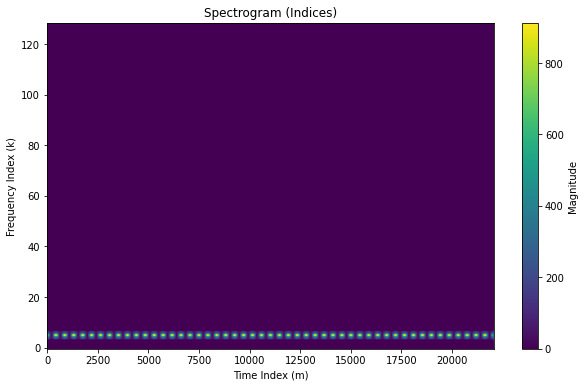

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

# Visualize the spectrogram
plt.figure(figsize=(10, 6))  # Set an appropriate figure size

# Display the spectrogram using imshow
plt.imshow(
    Y,
    aspect='auto',      # Auto aspect ratio to fit the data
    origin='lower',     # Place the frequency axis origin at the bottom
    cmap='viridis'      # Use a colormap (e.g., 'viridis', 'plasma', 'magma')
)

# Add color bar to show the magnitude scale
plt.colorbar(label='Magnitude')

# Label axes
plt.xlabel('Time Index (m)')
plt.ylabel('Frequency Index (k)')

# Add a title
plt.title('Spectrogram (Indices)')

# Show the plot
plt.show()


<div class="alert alert-block alert-warning">
Plot the spectrogram with the axis given in seconds and Hertz.
      This can be done with the <samp>extent</samp> keyword, using <samp>t</samp> and <samp>f</samp>.
      Furthermore, do only visualize the lowest 2 kHz by using <samp>plt.ylim</samp>.
</div>

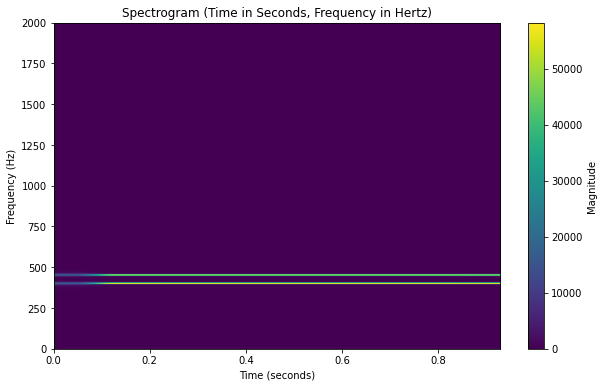

In [ ]:
# your code here...


# Visualize the spectrogram with axes in seconds and Hertz
plt.figure(figsize=(10, 6))  # Set an appropriate figure size

# Display the spectrogram using imshow
plt.imshow(
    Y,
    aspect='auto',              # Keep data aspect ratio
    origin='lower',             # Frequency axis origin at the bottom
    cmap='viridis',             # Use a colormap1
    extent=[t[0], t[-1], f[0], f[-1]]  # Map indices to seconds and Hertz
)

# Limit the frequency axis to the lowest 2 kHz
plt.ylim(0, 2000)

# Add color bar to represent magnitude
plt.colorbar(label='Magnitude')

# Label axes
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Add a title
plt.title('Spectrogram (Time in Seconds, Frequency in Hertz)')

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
Next, use a logarithmic decibel-scale for visualizing the values ${\mathcal Y}(m,k)$. (Recall that, given a value
      $v \in {\mathbb R}$, the decibel value is $10 \log_{10}(v)$.)
</div>

In [ ]:
import numpy as np
# your code here...
debR= 10* np.log10(Y+np.finfo(float).eps)

<div class="alert alert-block alert-warning">
Compute spectrograms using different window sizes
      (for example, $N\in\{256,1024,4096,8192\}$) and
      different hop sizes (for example, $H\in\{1,N/4,N/2\}$).
      Do only visualize the lowest 2 kHz.
      Discuss the trade-off between time resolution and frequency resolution.
</div>

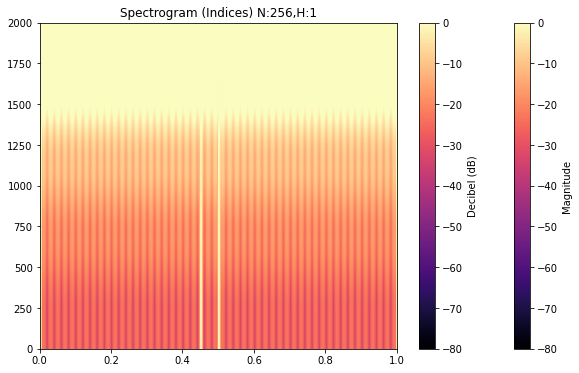

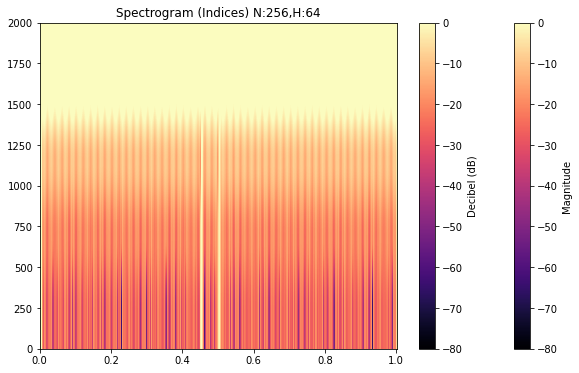

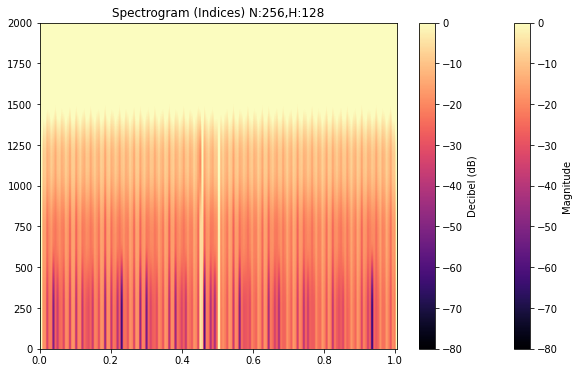

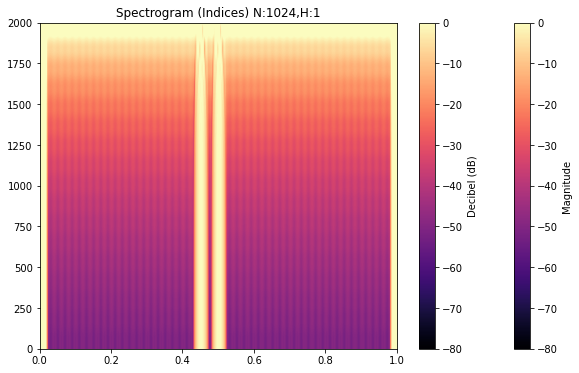

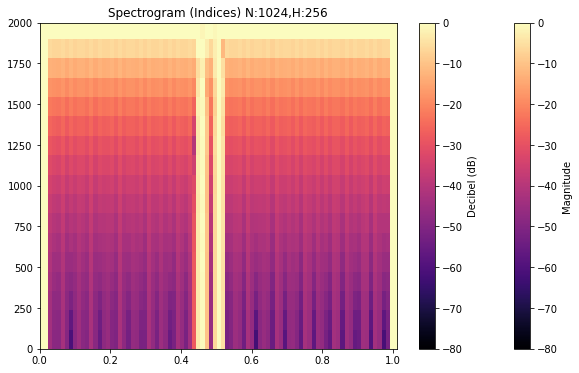

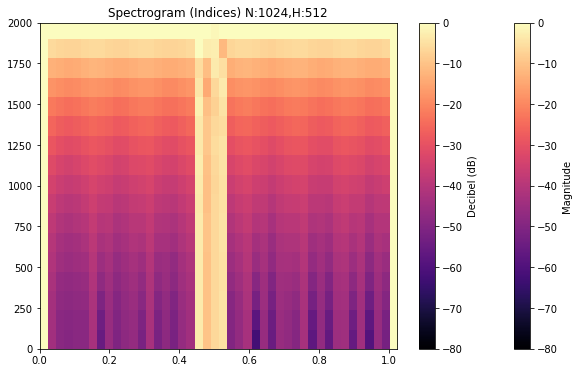

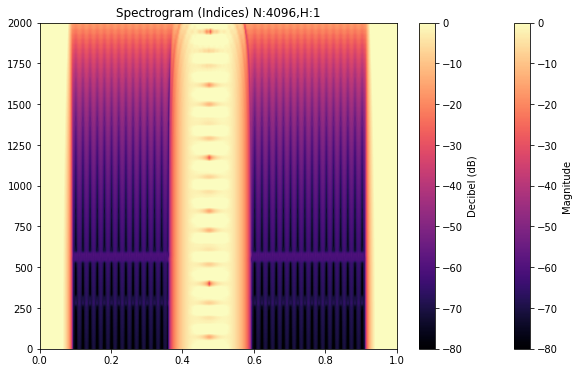

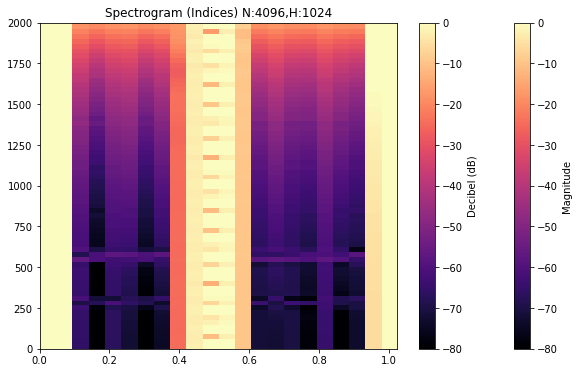

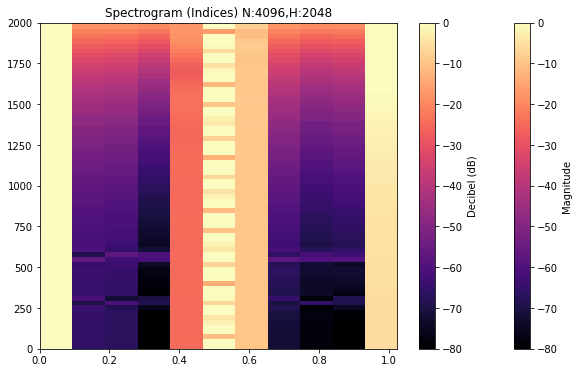

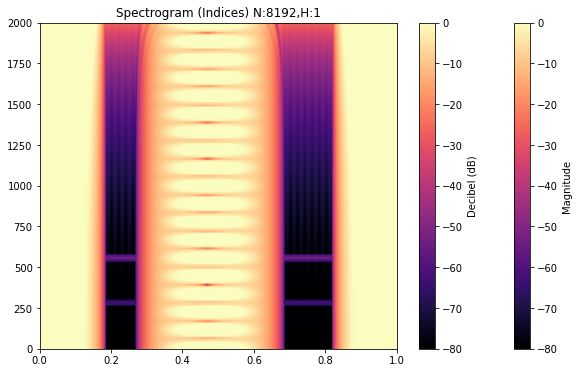

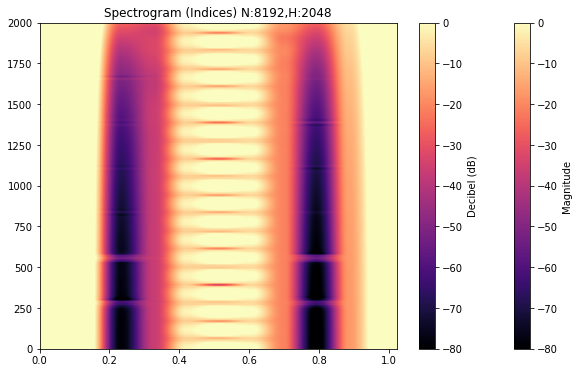

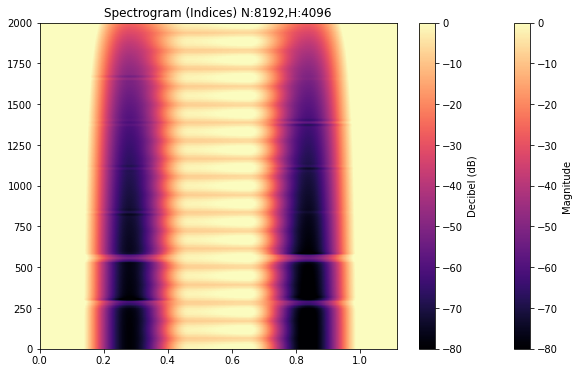

In [ ]:
# your code here...
from scipy import signal
import numpy as np
import librosa

# Visualize the spectrogram
window_sizes = [256, 1024, 4096, 8192]
hop_sizes = [1, lambda N: N//4, lambda N: N//2]
    
            
 
       
for N in window_sizes:
        for hop_size in hop_sizes:
            H = hop_size if isinstance(hop_size, int) else hop_size(N) 
            X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann',pad_mode='constant', center=True)
            Y = np.abs(X)**2
            f=librosa.fft_frequencies(sr=Fs,n_fft=N)
            t=librosa.frames_to_time(np.arange(X.shape[1]),sr=Fs,hop_length=H)  
            mandb=10*np.log10(Y+np.finfo(float).eps)
            plt.figure(figsize=(10, 6))  # Set an appropriate figure size
            freqLimit=f<=2000
            f=f[freqLimit]
            mandb=mandb[freqLimit,:]
            # Display the spectrogram using imshow
            plt.imshow(mandb, aspect='auto', cmap='magma', origin='lower', extent=[0, mandb.shape[1]*H/Fs, 0, Fs/2], vmin=-80, vmax=0)
            plt.colorbar(label='Magnitude')
            plt.ylim([0, 2000]) # Visualize only the lowest 2 kHz 
            plt.colorbar(label='Decibel (dB)')
            plt.title(f'Spectrogram (Indices) N:{N},H:{H}')    
plt.show()

# The High N show us good percasive and good fer resoltion
# The small N show us more hamonic         

<div class="alert alert-block alert-warning">
Try out other audio files.
</div>

KeyboardInterrupt: 

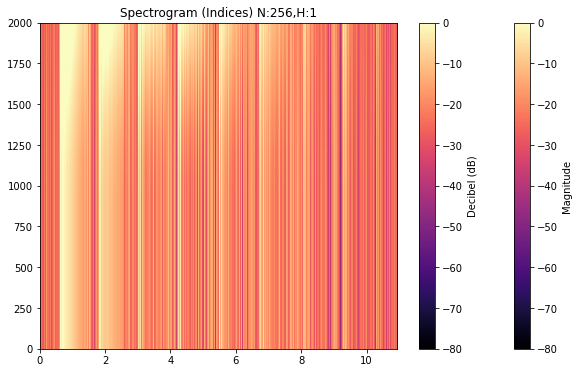

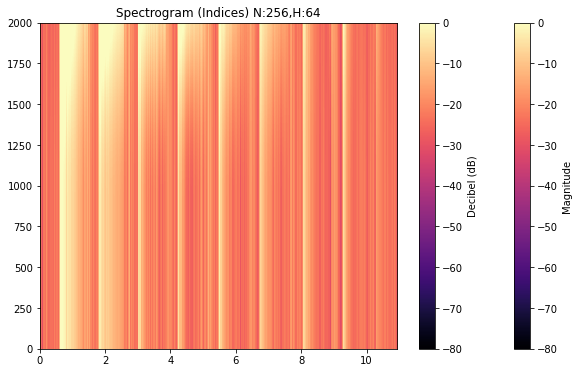

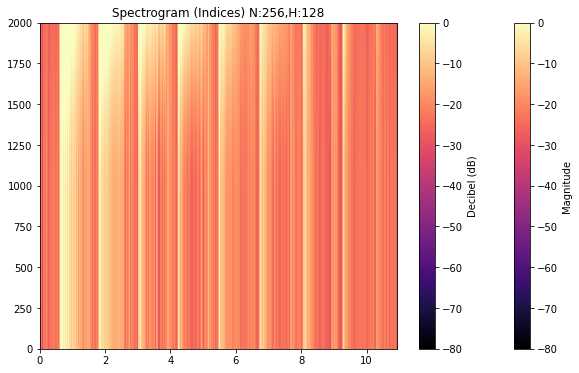

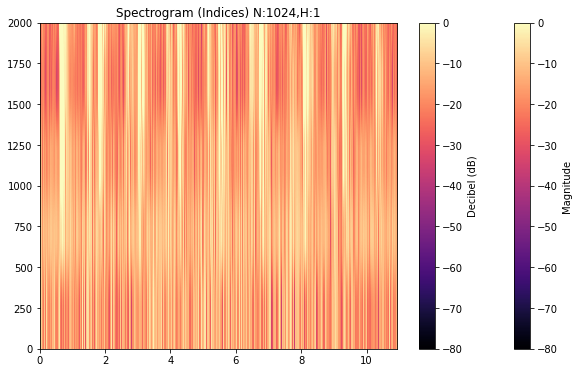

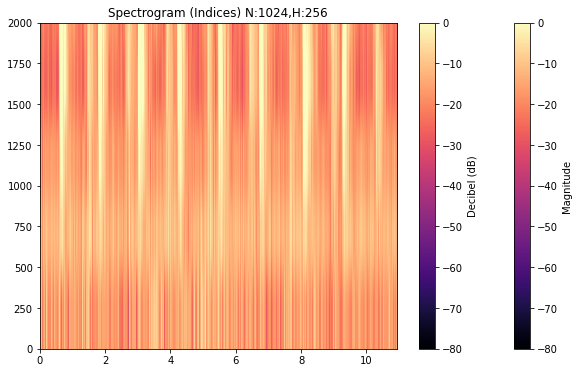

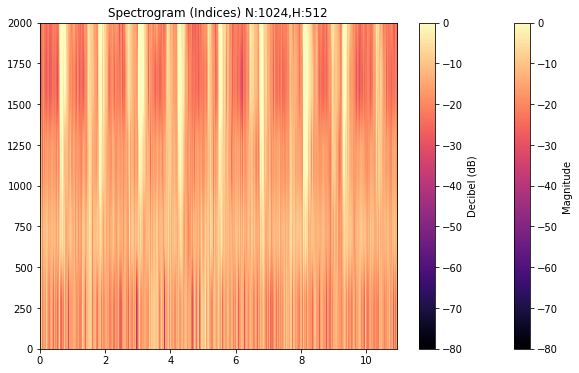

In [5]:
# your code here...
import soundfile as sf
import librosa
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x,fs=sf.read('files/Scale_Cmajor_Piano.wav')
window_sizes = [256, 1024, 4096, 8192]
hop_sizes = [1, lambda N: N//4, lambda N: N//2]
for N in window_sizes:
        for hop_size in hop_sizes:
            H = hop_size if isinstance(hop_size, int) else hop_size(N) 
            X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann',pad_mode='constant', center=True)
            Y = np.abs(X)**2
            f=librosa.fft_frequencies(sr=fs,n_fft=N)
            t=librosa.frames_to_time(np.arange(X.shape[1]),sr=fs,hop_length=H)  
            mandb=10*np.log10(Y+np.finfo(float).eps)
            plt.figure(figsize=(10, 6))  # Set an appropriate figure size
            freqLimit=f<=2000
            f=f[freqLimit]
            mandb=mandb[freqLimit,:]
            # Display the spectrogram using imshow
            plt.imshow(mandb, aspect='auto', cmap='magma', origin='lower', extent=[0, mandb.shape[1]*H/fs, 0, fs/2], vmin=-80, vmax=0)
            plt.colorbar(label='Magnitude')
            plt.ylim([0, 2000]) # Visualize only the lowest 2 kHz 
            plt.colorbar(label='Decibel (dB)')
            plt.title(f'Spectrogram (Indices) N:{N},H:{H}')    
plt.show()

The human sensation of the intensity of a sound is logarithmic in nature.
In practice, sounds that have an extremely small intensity may still be
relevant for human listeners.
Therefore, one often uses a decibel scale, which  is a logarithmic unit expressing
the ratio between two values.
As alternative of using a decibel scale, one often applies in audio processing
a step also referred to as *logarithmic compression*,
which works as follows. Let $\gamma\in{\mathbb R}_{>0}$ be a positive constant
and $\Gamma_\gamma:{\mathbb R}_{>0} \to {\mathbb R}_{>0}$ a function defined by

\begin{equation}
   \Gamma_\gamma(v):=\log(1+ \gamma \cdot v).
\end{equation}

for $v\in{\mathbb R}_{>0}$, where we use the natural logarithm.
Note that the function $\Gamma_\gamma$ yields a positive
value $\Gamma_\gamma(v)$ for any positive value $v\in{\mathbb R}_{>0}$.
Now, for a representation with positive values such as a spectrogram,
one obtains a compressed version by applying the function $\Gamma_\gamma$
to each of the values:

\begin{equation}
   (\Gamma_\gamma\circ {\mathcal Y})(m,k):=\log(1+ \gamma \cdot {\mathcal Y}(m,k)).
\end{equation}

Why is this operation called *compression* and what is the role of
the constant $\gamma$? The problem with representations such as a spectrogram
is that its values possess a large dynamic range. As a result,
small, but still relevant values may be dominated by large values.
Therefore, the idea of compression is to balance out this discrepancy
by reducing the difference between large and small values with
the effect to enhance the small values.
This exactly is done by the function $\Gamma_\gamma$, where the degree of compression
can be adjusted by the constant $\gamma$. The larger $\gamma$,
the larger the resulting compression

<div class="alert alert-block alert-info">
<b>Homework Exercise 2 (to be submitted in handwritten form and correct mathematical notation)</b><br>
Sketch the function $\Gamma_\gamma$ for the parameters $\gamma\in\{1,10,100\}$.
</div>

<div class="alert alert-block alert-warning">
<b>Lab Experiment 2</b><br>
Use the file <samp>Tone_C4_Piano.wav</samp> to define a signal $x$.
</div>

In [9]:
# your code here...
import librosa
import soundfile as sf
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
%matplotlib inline

# your code here...
x, Fs = sf.read("files/Tone_C4_Piano.wav")

if x.ndim > 1:
    x = x[:, 0]
Audio(x, rate=Fs)

<div class="alert alert-block alert-warning">
Compute the STFT and the spectrogram ${\mathcal Y}$ as above using a Hann window
    of size $N=4096$ and a hop size $H=2048$.
</div>

In [ ]:

N=4096
H=2048
stft_result= librosa.stft(x,n_fft=N,win_length=N,hop_length=H,pad_mode='constant', center=True)
spectogram=np.abs(stft_result)**2
magnitit=librosa.amplitude_to_db(spectogram)

<div class="alert alert-block alert-warning">
Compute the compressed version $\Gamma_\gamma\circ {\mathcal Y}$ of the spectrogram using different constants $\gamma\in\{1,10,100,1000,10000\}$.
Visualize the original spectrogram and its compressed versions.
What do you see? Discuss the results.
</div>

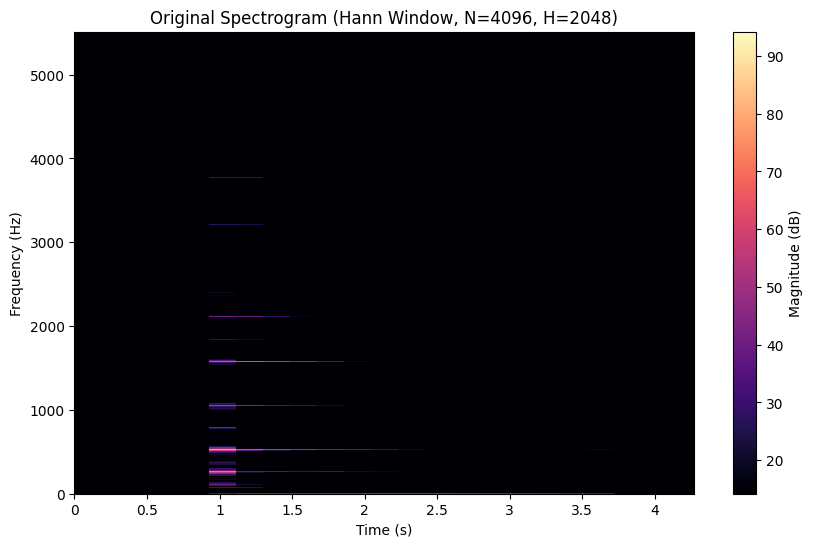

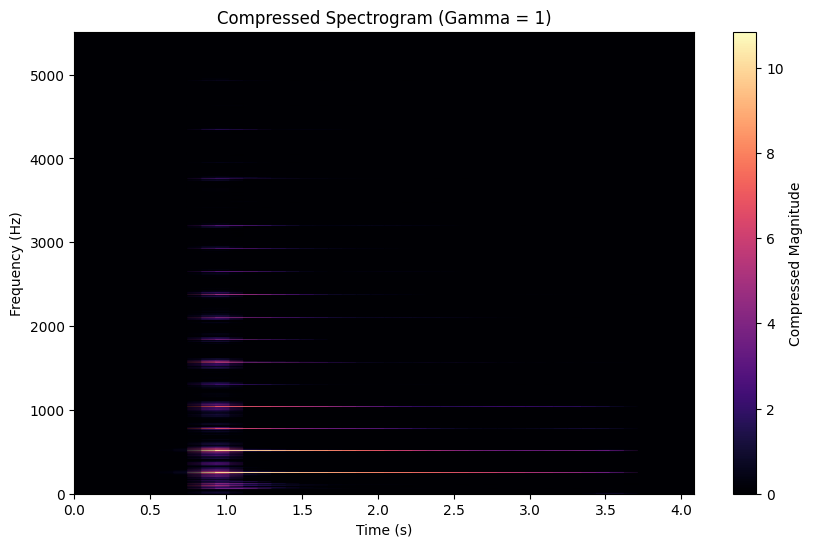

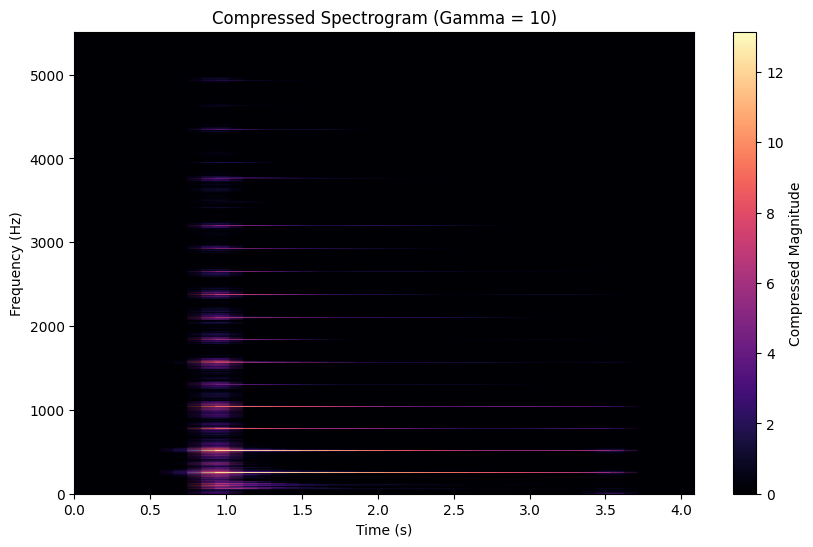

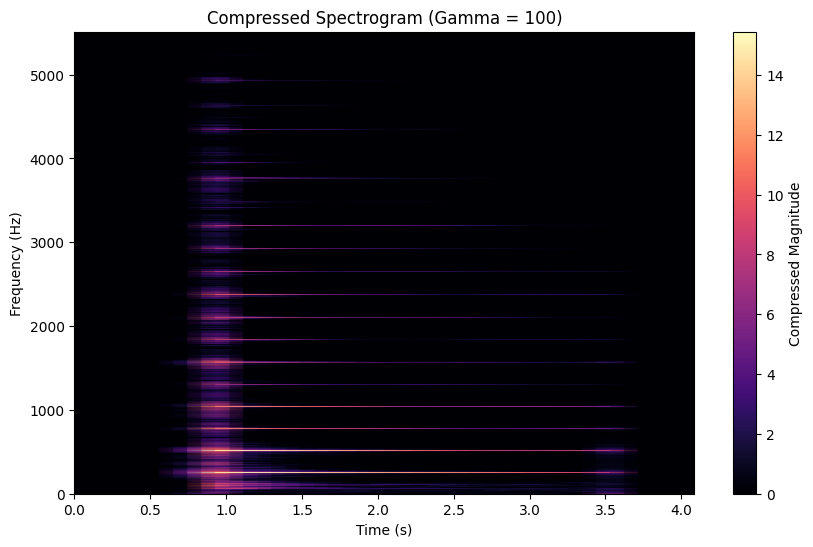

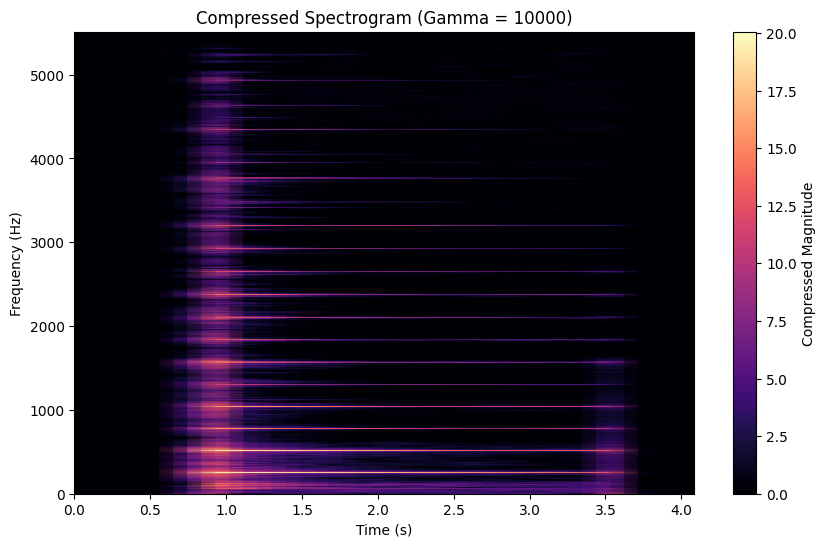

In [10]:
# your code here...
import librosa.display
gamma_values=[1,10,100,10000]

compressed_spectrograms = {
    gamma: np.log(1 + gamma * spectogram) for gamma in gamma_values
}
t = librosa.frames_to_time(np.arange(stft_result.shape[1]), sr=Fs, hop_length=H)
f = librosa.fft_frequencies(sr=Fs, n_fft=N)
# Visualize the original spectrogram in decibels‍
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    magnitit, sr=Fs, hop_length=H, x_axis="time", y_axis="hz", cmap="magma"
)
plt.colorbar(label="Magnitude (dB)")
plt.title(f"Original Spectrogram (Hann Window, N={N}, H={H})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Visualize compressed spectrograms for each gamma value‍
for gamma, compressed in compressed_spectrograms.items():
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, compressed, shading="gouraud", cmap="magma")
    plt.colorbar(label="Compressed Magnitude")
    plt.title(f"Compressed Spectrogram (Gamma = {gamma})")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

<div class="alert alert-block alert-warning">
Try out other audio files.
</div>

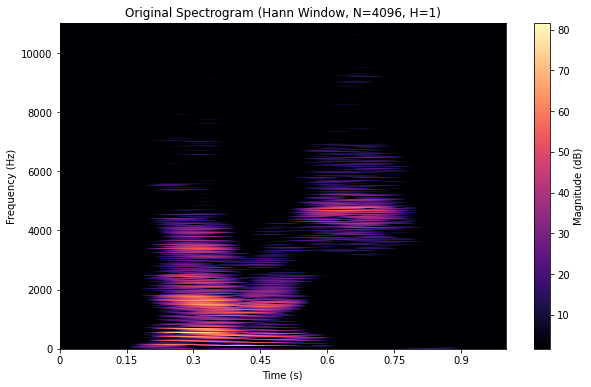

KeyboardInterrupt: 

In [8]:
import librosa.display
x, Fs = sf.read("files/Speech_Paris.wav")

if x.ndim > 1:
    x = x[:, 0]

stft_result= librosa.stft(x,n_fft=N,win_length=N,hop_length=H,pad_mode='constant', center=True)
spectogram=np.abs(stft_result)**2
magnitit=librosa.amplitude_to_db(spectogram)

gamma_values=[1,10,100,10000]

compressed_spectrograms = {
    gamma: np.log(1 + gamma * spectogram) for gamma in gamma_values
}
t = librosa.frames_to_time(np.arange(stft_result.shape[1]), sr=Fs, hop_length=H)
f = librosa.fft_frequencies(sr=Fs, n_fft=N)
# Visualize the original spectrogram in decibels‍
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    magnitit, sr=Fs, hop_length=H, x_axis="time", y_axis="hz", cmap="magma"
)
plt.colorbar(label="Magnitude (dB)")
plt.title(f"Original Spectrogram (Hann Window, N={N}, H={H})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Visualize compressed spectrograms for each gamma value‍
for gamma, compressed in compressed_spectrograms.items():
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, compressed, shading="gouraud", cmap="magma")
    plt.colorbar(label="Compressed Magnitude")
    plt.title(f"Compressed Spectrogram (Gamma = {gamma})")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

## <a name="LFS"></a> Log-Frequency Spectrogram

We now derive some audio features from the STFT by converting the
frequency axis (given in Hertz) into an axis that corresponds to musical pitches.
In Western music, the *equal-tempered scale* is most often used,
where the pitches of the scale correspond to the keys of a piano keyboard.
In this scale, each octave (the interval between two tones, whose fundamental frequencies differ by a factor of two) is split up into twelve logarithmically spaced units.
In MIDI notation, one considers $128$ pitches, which are serially
numbered starting with $0$ and ending with $127$.
The  MIDI pitch $p=69$ corresponds to the pitch ${A}{4}$
(having a center frequency of $440~\mathrm{Hz}$), which is often used as standard
for tuning musical instruments.
In general, the center frequency $F_{\mathrm{pitch}}(p)$ of a pitch $p\in[0:127]$ is
given by the formula

\begin{equation}
F_{\mathrm{pitch}}(p) = 2^{(p-69)/12} \cdot 440.
\end{equation}

The logarithmic perception of frequency motivates the use of a time-frequency
representation with a logarithmic frequency axis labeled by the pitches of
the equal-tempered scale.
To derive such a representation from a given spectrogram representation,
the basic idea is to assign each spectral coefficient ${\mathcal X}(m,k)$ to the pitch
with center frequency that is closest to the frequency $F_{\mathrm{coef}}(k)$.
More precisely, we define for each pitch $p\in[0:127]$ the set

\begin{equation}
    P(p) := \{k\in[0:K]:F_{\mathrm{pitch}}(p - 0.5) \leq   F_{\mathrm{coef}}(k) <  F_{\mathrm{pitch}}(p + 0.5)\}.
\end{equation}

From this, we obtain a log-frequency spectrogram
${\mathcal Y}_\mathrm{LF}:{\mathbb Z}\times [0:127]\to{\mathbb R}_{\geq 0}$ defined by

\begin{equation}
      {\mathcal Y}_\mathrm{LF}(m,p) := \sum_{k \in P(p)}{|{\mathcal X}(m,k)|^2}.
\end{equation}

By this definition, the frequency axis is partitioned logarithmically and
labeled linearly according to MIDI pitches.

<div class="alert alert-block alert-info">
<b>Homework Exercise 3 (to be submitted in handwritten form and correct mathematical notation)</b><br>
<ol>
   <li>Compute the center frequencies $F_{\mathrm{pitch}}(p)$ for $p=68$, $p=69$, and $p=70$.</li>
   <li>Compute the cutoff frequencies $F_{\mathrm{pitch}}(p - 0.5)$ and $F_{\mathrm{pitch}}(p + 0.5)$
       of the frequency band corresponding to pitch $p=69$.</li>
   <li>Using $F_\mathrm{s}=22050$ and $N=4096$, determine the set $P(p) \subseteq [0:K]$ for $p=69$.</li>
   <li>Also compute $P(p)$ for $p=57$, $p=45$, and $p=33$.</li>
   <li>Please explain with your own words why the definition of
          ${\mathcal Y}_\mathrm{LF}(m,p)$ may be
          problematic for small values of pitch $p$? How is the size of the
          set $P(p)$ influenced? Support your answer with a brief example.</li>
</ol>
</div>

In [ ]:
# write the function F_pitch(p)

print('Fpitch(%d) = %.2f Hz' % (68, F_pitch(68)))
print('Fpitch(%d) = %.2f Hz' % (69, F_pitch(69)))
print('Fpitch(%d) = %.2f Hz' % (70, F_pitch(70)))

In [ ]:
# compute the cutoff frequencies

In [ ]:
# compute the set of coefficients for p=69 using a function

Fs, N = 22050, 4096
print('P(%d) = %s' % (69, P(69, Fs, N)))

In [ ]:
# Compute the sets for p=57, p=45, and p=33

In [ ]:
# try out lower values of p

<div class="alert alert-block alert-warning">
<b>Lab Experiment 3</b><br>
Use the file <samp>Scale_Cmajor_Piano.wav</samp> to define a signal $x$.
</div>

In [ ]:
import soundfile as sf
from IPython.display import Audio

# Load the audio file
x, Fs = sf.read("Scale_Cmajor_Piano.wav")

# If the audio is stereo, select the first channel
if x.ndim > 1:
    x = x[:, 0]

# Play the audio signal
Audio(x, rate=Fs)


<div class="alert alert-block alert-warning">
Compute the STFT and the spectrogram as above using a Hann window
    of size $N=4096$ and a hop size $H=2048$.
    In the following you also need the information contained in the frequency vector <samp>F</samp>.
</div>

In [ ]:
# your code here...
N=4096
H=2048


<div class="alert alert-block alert-warning">
Compute the log-frequency spectrogram  ${\mathcal Y}_\mathrm{LF}$.
</div>

In [ ]:
def F_pitch(p):
    """Compute the center frequency F_pitch of a given MIDI pitch p."""
    return 2 ** ((p - 69) / 12) * 440

# Define the function to compute the set of coefficients P(p)
def P(p, Fs, N):
    """Compute the set of coefficients for a given pitch p."""
    lower_cutoff = F_pitch(p - 0.5)
    upper_cutoff = F_pitch(p + 0.5)

    
    F_coef = lambda k: k * Fs / N

    
    return [k for k in range(N // 2 + 1) if lower_cutoff <= F_coef(k) < upper_cutoff]

<div class="alert alert-block alert-warning">
Visualize the log-frequency spectrogram with the axes given in seconds and
      MIDI pitch, respectively.
</div>

In [ ]:
# your code here...

<div class="alert alert-block alert-warning">
Use log-compression to enhance
      the visualization.
</div>

In [ ]:
# your code here...

<div class="alert alert-block alert-warning">
Play around with different parameter settings for $N$ and $H$.
      Also, try out some other audio files.
</div>

In [ ]:
# your code here...

## <a name="Chroma"></a> Chroma-Features

The human perception of pitch is periodic in the sense that two pitches are
perceived as similar in *color* playing a similar harmonic role) if they
differ by one or several octaves (where, in our scale, an octave is defined as the distance of $12$ pitches).
For example, the pitches $p=60$ and $p=72$ are one octave apart, and the pitches
$p=57$ and $p=81$ are two octaves apart.
A pitch can be separated into two components,
which are referred to as *the height* and *chroma*.
The tone height refers to the octave number
and the chroma to the respective pitch spelling attribute.
In Western music notation, the $12$ pitch attributes are given by the
set $\{\mathrm{C},\mathrm{C}^{\sharp},\mathrm{D},\ldots,\mathrm{B}\}$.
Enumerating the chroma values, we identify this set with $[0:11]$
where $c=0$ refers to chroma $\mathrm{C}$, $c=1$ to $\mathrm{C}^{\sharp}$, and so on.
A *pitch class* is defined as the set of all pitches that
share the same chroma. For example, the pitch class that corresponds
to the chroma $c=0$ ($\mathrm{C}$) consists of the set
$\{0,12,24,36,48,60,72,84,96,108,120\}$
(which are the musical notes
$\{\ldots,\,\mathrm{C}\mathrm{0},\mathrm{C}\mathrm{1},\mathrm{C}\mathrm{2},\mathrm{C}\mathrm{3}\ldots\}$).

The main idea of *chroma features* is to aggregate all
spectral information that relates to a given pitch class into a single coefficient.
Given a pitch-based log-frequency spectrogram
${\mathcal Y}_\mathrm{LF}:{\mathbb Z}\times[0:127]\to {\mathbb R}_{\geq 0}$,
a chroma representation or *chromagram*
${\mathbb Z}\times[0:11]\to {\mathbb R}_{\geq 0}$ can be derived
by summing up all pitch coefficients that belong to the same chroma:

\begin{equation}
      {\mathcal C}(m,c) := \sum_{\{p \in [0:127]\,|\,p\,\mathrm{mod}\,12 = c\}}{{\mathcal Y}_\mathrm{LF}(m,p)}
\end{equation}
for $c\in[0:11]$.

<div class="alert alert-block alert-warning">
<b>Lab Experiment 4</b><br>
Derive the chroma representation ${\mathcal C}$ from the log-frequency spectrogram
      as computed in the last exercise.
</div>

In [ ]:
# your  code here...

<div class="alert alert-block alert-warning">
Visualize the chroma representation with the axes given in seconds and
      chroma indices, respectively. Try to explain what you see in the chroma visualization.
</div>

In [ ]:
# your code here...

<div class="alert alert-block alert-warning">
Also play around with different parameter settings for $N$ and $H$
      and try out some other audio files.
</div>

In [ ]:
# your code here...

<h4>Reference</h4>
<br/>

<div>
  <a href="http://www.springer.com/gp/book/9783319219448">
    <img src="./files/FMP_Cover.png" alt="FMP_Cover" width="80"  style="float:right;">
  </a>
</div>

<div style="float:left;">
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> <br />
Fundamentals of Music Processing &ndash; Audio, Analysis, Algorithms, Applications  <br />
ISBN: 978-3-319-21944-8<br />
483 p., <a href="http://www.springer.com/gp/book/9783319219448">Springer</a>, 2015  <br />
<a href="http://www.music-processing.de">www.music-processing.de</a>    <br />
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP">Accompanying Website</a>
</div>

<h4>Acknowledgment</h4>
<br/>
The International Audio Laboratories Erlangen are a joint institution of the Friedrich-Alexander-Universität Erlangen-Nürnberg (FAU) and Fraunhofer Institute for Integrated Circuits IIS.